# Cálculo simbólico de soluciones estacionarias 

Notebook para la obtencion de steady states del modelo propuesto

### Declaracion de librerías

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from sympy import *
from sympy import init_printing
init_printing() 


### Declaración de los símbolos en el sistema a usar

In [27]:
init_printing()
c = Symbol('c', real=True)  # positive constant, greater than 1 implies cooperativity, less than 1 anti-cooperativity
a_Gli = Symbol('a_Gli', real=True)   # transcriptional activation intensity for Gli
a_Gli3 = Symbol('a_Gli3', real=True)   # transcriptional activation intensity for Gli
r_Gli3R = Symbol('r_Gli3R', real=True)   # transcriptional repression intensity for Gli
k_Gli = Symbol('k_Gli', real=True)   # dissociation constant of activators for gene enhancers
k_Gli3 = Symbol('k_Gli3', real=True)   # dissociation constant of activators for gene enhancers
k_Gli3R = Symbol('k_Gli3R', real=True)   # dissociation constant of repressors for gene enhancers
k_RNAP = Symbol('k_RNAP', real=True)   # RNA polymerase binding affinity
RNAP = Symbol('RNAP', real=True)   # RNA polymerase concentration
c_b = Symbol('c_b', real=True)   # BEWARE constant

# from Lai-Schaffer classic model

Shh = Symbol('Shh', real=True)   # Shh quantity [0,30]
k_shh = Symbol('k_shh', real=True)   # dissociation constant shh-ptc bindings [0.58,2.0]
k_Ptc = Symbol('k_ptc', real=True)   # half maximal concentration of ptc which inhibits smo signlaing
k_deg = Symbol('k_deg', real=True)   # degradation constant for all Gli related proteins
k_g3rc = Symbol('k_g3rc', real=True)   # rate constant for the conversion to signal strengh
r_g3b = Symbol('r_g3b', real=True)   # basal rate of Gli3 synthesis
K_g3rc = Symbol('K_g3rc', real=True)   # sensitivity constant of the conversion to signal strengh
k_deg_p = Symbol('k_deg_p', real=True)  # Degradation rate constant for Ptc [0.045,0.071]
 
Gli = Symbol('Gli', real=True)
Gli3 = Symbol('Gli3', real=True)
Gli3R = Symbol('Gli3R', real=True)
Ptc = Symbol('Ptc', real=True)
F_reg = Symbol('F_reg', real=True)

## Declaración de las funciones implicadas en el sistema

### Funcion de la evolucion de la Señal

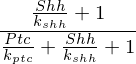

In [12]:
Signal=(1+Shh/k_shh)/(1+Shh/k_shh+Ptc/k_Ptc)
Signal

### Función de regulación para gradientes opuestos y no/total cooperacion de los factores de transcripcion

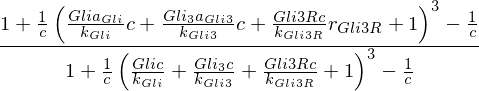

In [13]:
freg=(1-1/c+1/c*(1+a_Gli*c*Gli/k_Gli+a_Gli3*c*Gli3/k_Gli3+r_Gli3R*c*Gli3R/k_Gli3R)**3)/(1-1/c+1/c*(1+c*Gli/k_Gli+c*Gli3/k_Gli3+c*Gli3R/k_Gli3R)**3)
freg

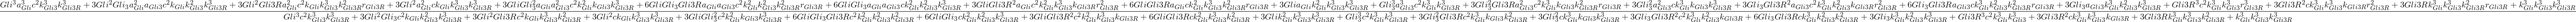

In [14]:
factor(expand(freg))

### Operador BEWARE

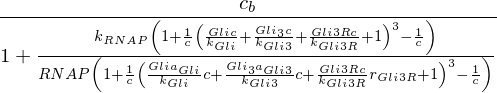

In [15]:
beware = c_b/(1+k_RNAP/(RNAP*freg))
beware


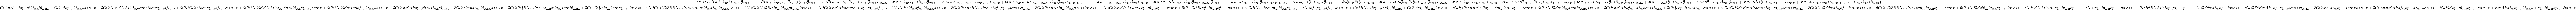

In [16]:
factor(expand(beware))

### Ecuacion de evolucion para Gli

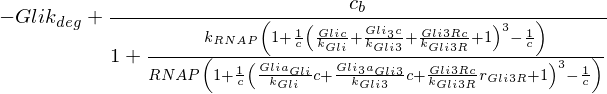

In [17]:
dGli_dt = beware-k_deg*Gli
dGli_dt

### Ecuacion de evolucion para Gli3

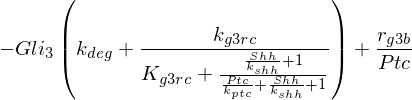

In [18]:
dGli3_dt = r_g3b/Ptc-Gli3*(k_deg+k_g3rc/(K_g3rc+Signal))
dGli3_dt

### Ecuacion de evolucion para Gli3R

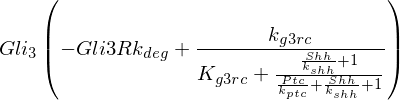

In [19]:
dGli3R_dt = Gli3*(k_g3rc/(K_g3rc+Signal)-k_deg*Gli3R)
dGli3R_dt


### Ecuacion de evolucion para Ptc

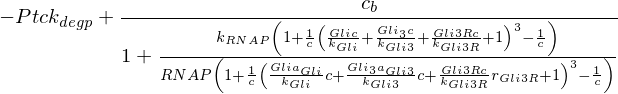

In [20]:
dPtc_dt = beware-k_deg_p*Ptc
dPtc_dt

## Calculo de los estados estacionarios

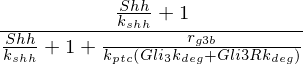

In [25]:
Signal_1 = Signal.subs({Ptc:r_g3b/(k_deg*Gli3+k_deg*Gli3R)})
Signal_1

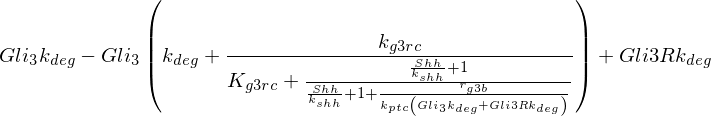

In [30]:
Equation_1=dGli3_dt.subs({Signal:Signal_1,r_g3b/Ptc:k_deg*Gli3+k_deg*Gli3R})
Equation_1

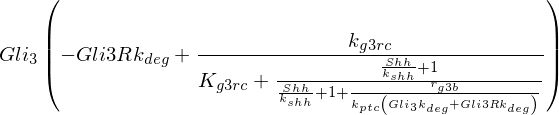

In [32]:
Equation_2=dGli3R_dt.subs({Signal:Signal_1})
Equation_2

In [33]:
solve([Equation_1,Equation_2],[Gli3,Gli3R])

KeyboardInterrupt: 

## Resolviendo ecuaciones

In [23]:
solve([dGli_dt, dGli3_dt,dGli3R_dt,dPtc_dt], [Gli,Gli3,Gli3R,Ptc])

KeyboardInterrupt: 

## Versiones

In [14]:
%reload_ext version_information

%version_information numpy, matplotlib, sympy

Software versions
Python 3.6.4 64bit [GCC 7.2.0]
IPython 6.2.1
OS Linux 4.13.0 45 generic x86_64 with debian stretch sid
numpy 1.13.3
matplotlib 2.2.2
sympy 1.1.1
Thu Jun 28 10:18:18 2018 CEST